In [1]:
import pandas as pd
from google.cloud import bigquery

import matplotlib.pyplot as plt

client = bigquery.Client()

In [2]:
sintoma_geral_idade = """
select
 pk_indicador
,indicador
,variavel_abertura_2
,categoria_abertura_2
,sum(cast(replace(maio,' ','') as int)) as maio
,sum(cast(replace(junho,' ','') as int)) as junho
,sum(cast(replace(julho,' ','') as int)) as julho
 from `pnad_covid.tb_pais`
where
tipo_dado = 'quantidade' and
maio is not null and junho is not null and julho is not null
and pk_indicador = 107
and variavel_abertura_1 = 'Grupos de Idade 2'
and categoria_abertura_2 is not null
group by
pk_indicador
,indicador
,variavel_abertura_2
,categoria_abertura_2

"""

df_sintoma_geral_idade= client.query(sintoma_geral_idade).to_dataframe()

#GERAL


In [4]:
df_sintoma_geral_idade['Total'] = df_sintoma_geral_idade['maio']+df_sintoma_geral_idade['junho']+df_sintoma_geral_idade['julho']

In [5]:
df_sintoma_geral_idade.head()

,pk_indicador,indicador,variavel_abertura_2,categoria_abertura_2,maio,junho,julho,Total
0,107,Pessoas que apresentaram algum dos sintoma(s) ...,Procura a estabelecimento de saúde,Não foi a estabelecimento de saúde,20236,12524,10647,43407
1,107,Pessoas que apresentaram algum dos sintoma(s) ...,Procura a estabelecimento de saúde,Foi a estabelecimento de saúde,3769,2979,3141,9889


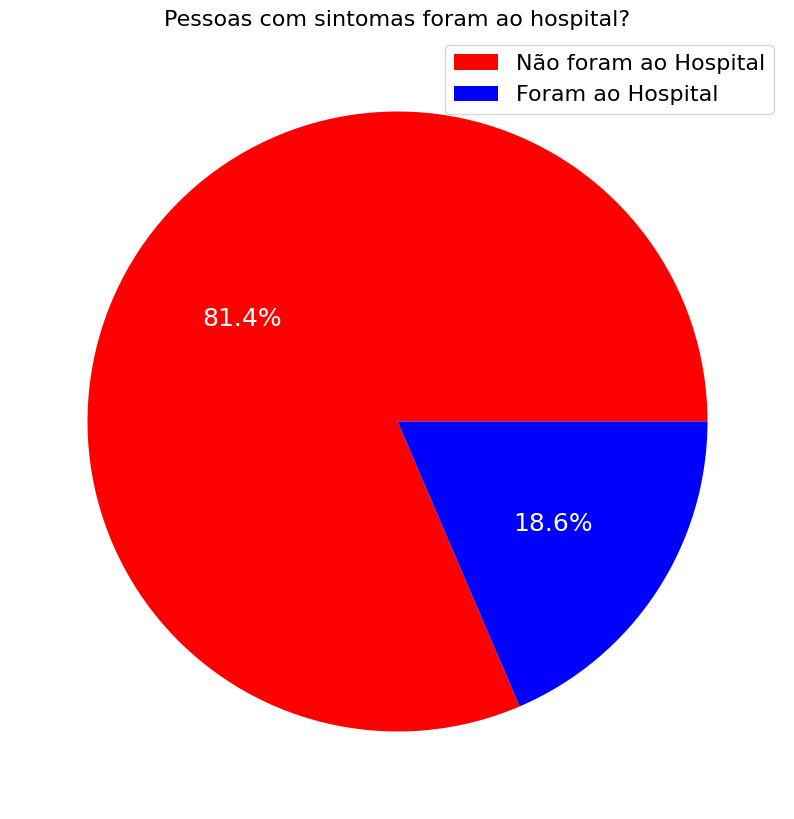

In [11]:
labels = ['Não foram ao Hospital', 'Foram ao Hospital']
sizes = [10, 15]
colors = ['red', 'blue']



graf = df_sintoma_geral_idade.plot.pie(y='Total',x='mes',figsize=sizes, colors=colors, autopct='%1.1f%%',textprops={'color': 'white', 'fontsize': 18})
plt.title('Pessoas com sintomas foram ao hospital?', fontsize = 16)
plt.axis('off')
plt.legend(labels, loc="best",fontsize=16)

plt.show()

##DF com os 3 meses

In [ ]:
df_sintomas_60_anos_geral = pd.concat([df_mais_60_maio,df_mais_60_junho,df_mais_60_julho])

In [ ]:
df_sintomas_60_anos_geral

,pk_indicador,indicador,variavel_abertura_1,categoria_abertura_1,variavel_abertura_2,mes,qtd,Total,%
categoria_abertura_2,,,,,,,,,
Não foi a estabelecimento de saúde,107,Pessoas que apresentaram algum dos sintoma(s) ...,Grupos de Idade 2,mais 60 anos,Procura a estabelecimento de saúde,maio,3015,3560,84.69
Foi a estabelecimento de saúde,107,Pessoas que apresentaram algum dos sintoma(s) ...,Grupos de Idade 2,mais 60 anos,Procura a estabelecimento de saúde,maio,545,3560,15.31
Não foi a estabelecimento de saúde,107,Pessoas que apresentaram algum dos sintoma(s) ...,Grupos de Idade 2,mais 60 anos,Procura a estabelecimento de saúde,junho,1986,2451,81.03
Foi a estabelecimento de saúde,107,Pessoas que apresentaram algum dos sintoma(s) ...,Grupos de Idade 2,mais 60 anos,Procura a estabelecimento de saúde,junho,465,2451,18.97
Não foi a estabelecimento de saúde,107,Pessoas que apresentaram algum dos sintoma(s) ...,Grupos de Idade 2,mais 60 anos,Procura a estabelecimento de saúde,julho,1787,2254,79.28
Foi a estabelecimento de saúde,107,Pessoas que apresentaram algum dos sintoma(s) ...,Grupos de Idade 2,mais 60 anos,Procura a estabelecimento de saúde,julho,467,2254,20.72


###Grafico de coluna dos 3 meses

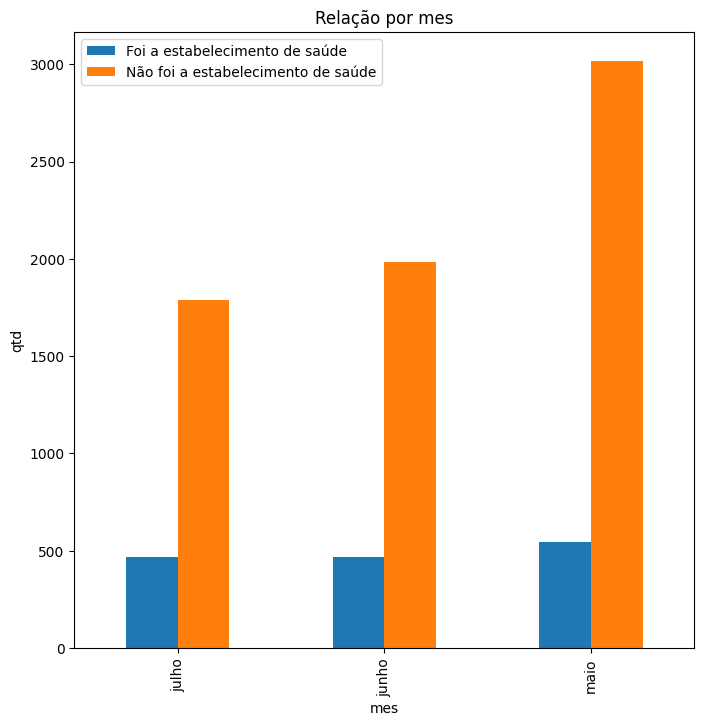

In [ ]:
pvt = df_sintomas_60_anos_geral.pivot_table(values = 'qtd', index = 'mes', columns = 'categoria_abertura_2')

pvt.plot(kind = 'bar',figsize=(8,8))
plt.title('Relação por mes')
plt.xlabel('mes')
plt.ylabel('qtd')
plt.legend(loc = 'best')

###Grafico de evolução da % dos que foram ao hospital

In [ ]:
df_sintomas_60_anos_geral.reset_index(inplace=True)

In [ ]:
df_sintomas_60_anos_foram = df_sintomas_60_anos_geral[df_sintomas_60_anos_geral['categoria_abertura_2'] == 'Foi a estabelecimento de saúde']

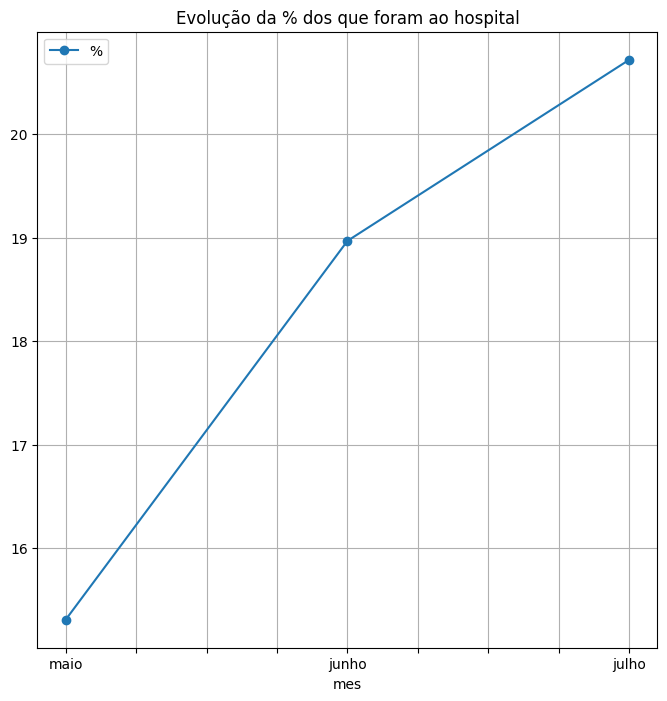

In [ ]:
df_sintomas_60_anos_foram.plot(kind='line',marker = 'o',figsize=(8,8),y='%',x='mes',)

plt.title('Evolução da % dos que foram ao hospital')
plt.legend(loc='best')
plt.grid(True)